# Midterm Project


You will demonstrate your ability to solve a classification task.

The notebook that you submit *should follow the Recipe for Machine Learning* in addition to answering the questions.

# Objectives

For the student to demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.

There will be little explicit direction for this task.

It is meant to be analagous to a pre-interview task that a potential employer might assign
to verify your skill

# Submission guidelines

**In addition** to showing your mastery, there is one task you must perform to make grading easier.

- You will implement the body of a subroutine `MyModel`
    - that takes as argument, the name of a CSV file containing the test set
    - performs predictions on each example in the test set
    - returns an array or predictions with a one-to-one correspondence with the examples in the test set
    
- You will call the subroutine, passing the name of the test set file that we will supply.

In this way, we can get the results of your model by executing a single cell.

`MyModel` has one *required* parameter: `fileName`
- you may add additional parameters as you need

`MyModel` is where you will perform whatever pre-processing you require, for example
- imputing missing values
- transformations
- whatever else you need


Here is the cell **that must appear as the last cell in your notebook**
- It points to a test file
- Your code must make predictions on this test file
- There are *no labels* visible to you in the test file; these are available only to the grader

In [582]:
data_file = "5th_yr.csv"

In [583]:
TEST_PATH = "./data/midterm_project/bankruptcy/holdout"

import pandas as pd
import os

testFileName = os.path.join(TEST_PATH, data_file)

def MyModel(fileName=None):
    print("Test file: ", fileName)
    
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    
    
    return predictions

predicts = MyModel(fileName=testFileName)


Test file:  ./data/midterm_project/bankruptcy/holdout/5th_yr.csv


# The problem

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.
- Each row of data corresponds to a single company
- There are 64 attributes, described in the section below
- The last column (`Bankrupt`) is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The first column is a Company Identifier

# Recipe A.1: Get the data

# The Data

Here's the code to get the data.

In [584]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from scipy import stats
from statistics import stdev

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import f1_score



# Note the use of *relative path*; your assignments should all use relative rather than absolute paths
DATA_PATH = "./data/midterm_project/bankruptcy/train"

data = pd.read_csv( os.path.join(DATA_PATH, data_file) )


## Description of attributes

# Recipe A.2: Have a look at the data

In [585]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
X1          4818 non-null object
X2          4818 non-null object
X3          4818 non-null object
X4          4818 non-null object
X5          4818 non-null object
X6          4818 non-null object
X7          4818 non-null object
X8          4818 non-null object
X9          4818 non-null float64
X10         4818 non-null object
X11         4818 non-null object
X12         4818 non-null object
X13         4818 non-null float64
X14         4818 non-null object
X15         4818 non-null object
X16         4818 non-null object
X17         4818 non-null object
X18         4818 non-null object
X19         4818 non-null float64
X20         4818 non-null float64
X21         4818 non-null object
X22         4818 non-null object
X23         4818 non-null float64
X24         4818 non-null object
X25         4818 non-null object
X26         4818 non-null object
X27         4818 non-null obje

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


In [586]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
4813,0.21199,0.20585,0.1417,1.7941,72.981,0,0.26531,3.8579,0.9842,0.79415,...,0.26694,0.73275,0.022101,?,3.5081,66.1710,5.516,1.4476,0,1985
4814,0.3119,0.09958,0.57936,10.679,245.98,0,0.31317,9.0422,1.0516,0.90042,...,0.3464,0.70705,0.044114,14.018,7.0618,20.7760,17.568,2.9149,0,3963
4815,-0.029746,0.44898,0.39136,1.9388,7.8073,-0.020006,-0.030561,1.2259,1.0001,0.5504,...,-0.054046,0.99986,0.058336,15.547,8.7022,34.3700,10.62,23.086,0,4167
4816,0.28473,0.079573,0.46261,6.8137,-81.158,-0.79551,0.28473,11.567,6.0718,0.92043,...,0.30935,0.19889,0,?,28.5,4.7834,76.305,13.263,0,1579
4817,0.12009,0.63072,-0.10501,0.81336,-43.226,-0.17492,0.15424,0.5855,3.1990,0.36928,...,0.3252,0.04347,0,12.825,16.441,64.1950,5.6858,5.8982,0,3294


- No null data in any column.
- However, we notice that there are "?" in some attributes. We need to replace the text data "?" with some numerical data later.

In [587]:
data.dtypes

X1           object
X2           object
X3           object
X4           object
X5           object
X6           object
X7           object
X8           object
X9          float64
X10          object
X11          object
X12          object
X13         float64
X14          object
X15          object
X16          object
X17          object
X18          object
X19         float64
X20         float64
X21          object
X22          object
X23         float64
X24          object
X25          object
X26          object
X27          object
X28          object
X29          object
X30         float64
             ...   
X37          object
X38          object
X39         float64
X40          object
X41          object
X42         float64
X43         float64
X44         float64
X45          object
X46          object
X47          object
X48          object
X49         float64
X50          object
X51          object
X52          object
X53          object
X54          object
X55         float64


- Indeed, X1 through X64 should all be float64 rather than object, because those accounting attributes are all floating point numbers with decimal places.
- We also need to change data type later.

In [588]:
data.describe()

,X9,X13,X19,X20,X23,X30,X31,X39,X42,X43,X44,X49,X55,X56,X58,X62,Bankrupt,Id
count,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4.818000e+03,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000
mean,1.579277,0.452284,-0.082028,57.002168,-0.090357,0.691991,-0.068612,0.019158,-0.014902,155.612840,98.610765,-0.072253,1.074023e+04,0.056109,0.959585,177.494445,0.063927,3499.858032
std,1.342723,34.196231,5.754879,182.018911,5.725258,11.217691,5.748967,0.756891,2.617310,795.989622,725.594072,2.638443,8.284685e+04,0.755462,0.932427,2279.713700,0.244648,1392.049260
min,0.000191,-310.340000,-310.800000,-29.340000,-310.890000,-23.060000,-310.800000,-47.047000,-143.520000,-3975.600000,-3946.200000,-144.800000,-1.118500e+06,-46.788000,-0.085920,0.000000,0.000000,1071.000000
25%,1.015600,0.024954,0.004368,18.537750,0.002728,0.085560,0.007006,0.005536,0.000687,76.214500,39.050250,-0.022447,9.771450e+01,0.011478,0.876940,45.065750,0.000000,2296.250000
50%,1.140500,0.067723,0.035307,38.623000,0.030074,0.225955,0.042826,0.040252,0.040963,106.670000,59.014000,0.012481,1.829500e+03,0.053663,0.950825,73.879500,0.000000,3500.500000
75%,1.814050,0.134847,0.088287,66.850750,0.075800,0.406145,0.098331,0.091854,0.090831,149.365000,86.087750,0.060499,7.786950e+03,0.124030,0.990358,118.597500,0.000000,4704.750000
max,37.807000,2340.200000,77.244000,9928.500000,77.244000,656.450000,77.244000,2.901100,40.386000,40515.000000,40515.000000,16.866000,4.212200e+06,1.000000,47.788000,127450.000000,1.000000,5909.000000


In [589]:
data.shape

(4818, 66)

# Recipe A.3: Define a performance measure
- Let's use Accuracy as a performance measure. We also check recall, precision, specificity & false positive.
- Indeed, we'll find out later that accuracy is not a very good performance measure here. We will instead use F1 score as a performance measure after resampling in the extra credit part 1.

# Recipe A.4: Create a test set

- "holdout" **does not** have targets (Column "Bankrupt") associated with it, so we can't use data in "holdout" as examples on which to evaluate the Performance Metric.

- So, let's further split "data" into X_train, y_train, X_test, y_test

In [590]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns = ['Bankrupt']), data['Bankrupt'], test_size=0.2, random_state=42)

In [591]:
# Let's take a look at the shape 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((3854, 65), (964, 65), (3854,), (964,))

In [592]:
# Let's take a look at the head 
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Id
220,0.044757,0.49112,0.001948,1.0137,-10.922,0.13414,0.050963,0.97991,1.0891,0.48125,...,0.081838,0.093001,0.91816,0.72595,39.822,11.499,109.670,3.3281,0.55093,5691
1361,0.00969,0.60158,0.21247,2.6707,42.71,0.035651,0.012172,0.62063,1.0472,0.37336,...,0.045033,0.025954,0.95497,1.2706,10.178,4.8416,45.180,8.0788,1.5559,1101
1010,0.014994,0.73291,0.34177,2.1422,-74.761,0.002097,0.003592,0.36443,1.1278,0.26709,...,0.136290,0.056139,0.99686,1.2507,16.314,13.388,96.841,3.7691,3.1415,4461
2952,0.351,0.25999,0.672,4.0607,70.293,0,0.43429,2.8463,2.0269,0.74001,...,0.209330,0.47432,0.79193,0,22.838,3.9075,39.539,9.2315,18.69,3715
2135,0.030069,0.58084,0.004893,1.0101,-9.063,0,0.03983,0.72163,4.6379,0.41916,...,0.009166,0.071737,0.99141,0.22429,44.595,16.789,38.151,9.5672,9.0879,4257


In [593]:
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Id
4340,0.001173,0.67203,0.14227,1.2156,-49.408,0.016824,0.001271,0.48075,1.00740,0.32308,...,0.007312,0.003629,0.99269,0.037272,12.302,4.0442,140.440,2.5991,8.6745,3119
1221,0.13963,0.25081,0.25848,2.2523,31.714,0,0.18239,2.9871,1.54600,0.74919,...,0.124670,0.18637,0.88279,0.044616,11.279,5.1096,48.732,7.4899,2.8891,3687
2083,0.1476,0.097863,0.46987,6.4957,59.981,0.003564,0.18156,9.2184,1.44620,0.90214,...,0.123660,0.16362,0.87543,0,5.5314,6.8732,21.578,16.916,3.2526,5358
1044,0.032618,0.74375,0.052153,1.1584,-49.698,0.11127,0.044782,0.33163,1.05450,0.24665,...,0.051681,0.13224,0.94832,1.6806,6.5521,33.065,59.524,6.1319,3.2633,3134
2555,0.022155,0.54875,0.54093,2.8668,14.402,0,0.022155,0.82231,0.61232,0.45125,...,0.066985,0.049097,0.96466,0.55833,1.1969,2.5829,172.720,2.1132,3.6164,4500


In [594]:
y_train.head()

220     0
1361    0
1010    0
2952    0
2135    0
Name: Bankrupt, dtype: int64

In [595]:
y_test.head()

4340    0
1221    0
2083    0
1044    0
2555    0
Name: Bankrupt, dtype: int64

# Recipe B: Exploratory Data Analysis (EDA)

- Plot X_train histogram for X1 through X64

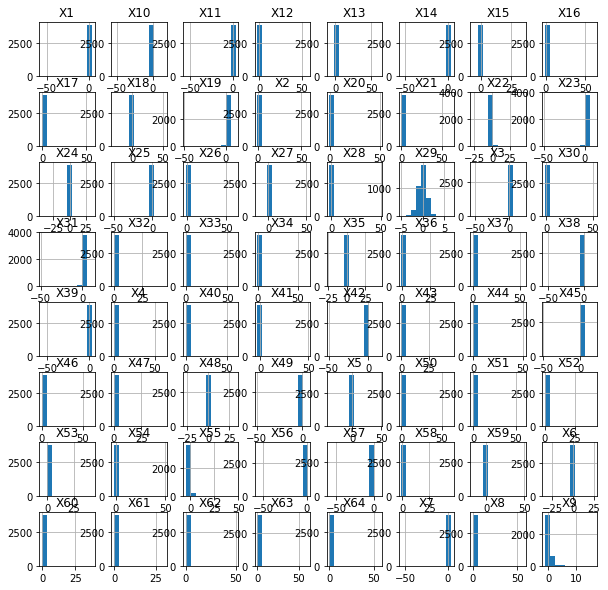

In [665]:
hist = X_train.hist(figsize=(10,10))

# Recipe C.1: Cleaning


## (1) Replace all "?" in X_train & X_test with NaN, then change data type from object to float64 
- keep "Id" as int64

In [597]:
list(X_train['X1']).count('?')

2

In [598]:
X_train = X_train.replace('?', np.NaN)
X_test = X_test.replace('?', np.NaN)
list(X_train['X1']).count('?')

0

In [599]:
X_train = X_train.astype('float64')
X_train['Id'] = X_train['Id'].astype('int64')

X_test = X_test.astype('float64')
X_test['Id'] = X_test['Id'].astype('int64')

X_train.isnull().sum()

X1        2
X2        2
X3        2
X4       10
X5        9
X6        2
X7        2
X8       10
X9        0
X10       2
X11       2
X12      10
X13       0
X14       2
X15       4
X16      10
X17      10
X18       2
X19       0
X20       0
X21      59
X22       2
X23       0
X24      94
X25       2
X26      10
X27     241
X28      66
X29       2
X30       0
       ... 
X36       2
X37    1665
X38       2
X39       0
X40      10
X41      48
X42       0
X43       0
X44       0
X45     177
X46      10
X47      28
X48       2
X49       0
X50      10
X51       2
X52      28
X53      66
X54      66
X55       0
X56       0
X57       2
X58       0
X59       2
X60     177
X61       9
X62       0
X63      10
X64      66
Id        0
Length: 65, dtype: int64

In [600]:
X_test.isnull().sum()

X1       0
X2       0
X3       0
X4       5
X5       1
X6       0
X7       0
X8       4
X9       0
X10      0
X11      0
X12      5
X13      0
X14      0
X15      2
X16      4
X17      4
X18      0
X19      0
X20      0
X21     15
X22      0
X23      0
X24     22
X25      0
X26      4
X27     64
X28     17
X29      0
X30      0
      ... 
X36      0
X37    403
X38      0
X39      0
X40      5
X41     14
X42      0
X43      0
X44      0
X45     43
X46      5
X47      3
X48      0
X49      0
X50      4
X51      0
X52      4
X53     17
X54     17
X55      0
X56      0
X57      0
X58      0
X59      0
X60     43
X61      3
X62      0
X63      5
X64     17
Id       0
Length: 65, dtype: int64

- Since "Bankrupt" data type is int64, there's no "?" in its column. Thus, we don't need to alter y_train and y_test

In [601]:
X_train.shape, y_train.shape

((3854, 65), (3854,))

## (2) Replace NaN in X_train & X_test with median
- Since the function for each X is given, I was initially trying to derive the exact number for NaN using the known X's of each company. However, I realized that many X's associated with NaN are also missing. 
- Since the "exact" way doesn't work, let's use median to fill NaN.

In [602]:
X_train_median = X_train.median()

X_train.fillna(X_train_median, inplace = True)
X_test.fillna(X_train_median, inplace = True)

X_train.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
      ..
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
X58    0
X59    0
X60    0
X61    0
X62    0
X63    0
X64    0
Id     0
Length: 65, dtype: int64

In [603]:
X_train.shape, y_train.shape

((3854, 65), (3854,))

In [604]:
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Id
220,0.044757,0.49112,0.001948,1.0137,-10.922,0.134140,0.050963,0.97991,1.0891,0.48125,...,0.081838,0.093001,0.91816,0.72595,39.822,11.4990,109.670,3.3281,0.55093,5691
1361,0.009690,0.60158,0.212470,2.6707,42.710,0.035651,0.012172,0.62063,1.0472,0.37336,...,0.045033,0.025954,0.95497,1.27060,10.178,4.8416,45.180,8.0788,1.55590,1101
1010,0.014994,0.73291,0.341770,2.1422,-74.761,0.002097,0.003592,0.36443,1.1278,0.26709,...,0.136290,0.056139,0.99686,1.25070,16.314,13.3880,96.841,3.7691,3.14150,4461
2952,0.351000,0.25999,0.672000,4.0607,70.293,0.000000,0.434290,2.84630,2.0269,0.74001,...,0.209330,0.474320,0.79193,0.00000,22.838,3.9075,39.539,9.2315,18.69000,3715
2135,0.030069,0.58084,0.004893,1.0101,-9.063,0.000000,0.039830,0.72163,4.6379,0.41916,...,0.009166,0.071737,0.99141,0.22429,44.595,16.7890,38.151,9.5672,9.08790,4257


## (3) Set "Id" as index for X_train & X_test

In [605]:
X_train.set_index('Id', inplace=True)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
Id,,,,,,,,,,,,,,,,,,,,,
5691,0.044757,0.49112,0.001948,1.0137,-10.922,0.134140,0.050963,0.97991,1.0891,0.48125,...,6981.500,0.081838,0.093001,0.91816,0.72595,39.822,11.4990,109.670,3.3281,0.55093
1101,0.009690,0.60158,0.212470,2.6707,42.710,0.035651,0.012172,0.62063,1.0472,0.37336,...,46802.000,0.045033,0.025954,0.95497,1.27060,10.178,4.8416,45.180,8.0788,1.55590
4461,0.014994,0.73291,0.341770,2.1422,-74.761,0.002097,0.003592,0.36443,1.1278,0.26709,...,11760.000,0.136290,0.056139,0.99686,1.25070,16.314,13.3880,96.841,3.7691,3.14150
3715,0.351000,0.25999,0.672000,4.0607,70.293,0.000000,0.434290,2.84630,2.0269,0.74001,...,3206.200,0.209330,0.474320,0.79193,0.00000,22.838,3.9075,39.539,9.2315,18.69000
4257,0.030069,0.58084,0.004893,1.0101,-9.063,0.000000,0.039830,0.72163,4.6379,0.41916,...,15.613,0.009166,0.071737,0.99141,0.22429,44.595,16.7890,38.151,9.5672,9.08790


In [606]:
X_test.set_index('Id', inplace=True)
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
Id,,,,,,,,,,,,,,,,,,,,,
3119,0.001173,0.672030,0.142270,1.2156,-49.408,0.016824,0.001271,0.48075,1.00740,0.32308,...,19985.0,0.007312,0.003629,0.99269,0.037272,12.3020,4.0442,140.440,2.5991,8.6745
3687,0.139630,0.250810,0.258480,2.2523,31.714,0.000000,0.182390,2.98710,1.54600,0.74919,...,2443.9,0.124670,0.186370,0.88279,0.044616,11.2790,5.1096,48.732,7.4899,2.8891
5358,0.147600,0.097863,0.469870,6.4957,59.981,0.003564,0.181560,9.21840,1.44620,0.90214,...,19041.0,0.123660,0.163620,0.87543,0.000000,5.5314,6.8732,21.578,16.9160,3.2526
3134,0.032618,0.743750,0.052153,1.1584,-49.698,0.111270,0.044782,0.33163,1.05450,0.24665,...,4087.9,0.051681,0.132240,0.94832,1.680600,6.5521,33.0650,59.524,6.1319,3.2633
4500,0.022155,0.548750,0.540930,2.8668,14.402,0.000000,0.022155,0.82231,0.61232,0.45125,...,4408.8,0.066985,0.049097,0.96466,0.558330,1.1969,2.5829,172.720,2.1132,3.6164


In [607]:
X_train.shape, y_train.shape

((3854, 64), (3854,))

# Recipe C.2: Handling non-numeric features/targets

No categorical feature here

# Recipe C.3: Transformations
No transformation needed here

# Recipe C.4: Scaling

- Since the 64 features are based on different ranges, I decide to normalize them. 
- First, de-mean the number, then divide by standard deviation. 

(The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.)

In [608]:
def normalize(df):
    for i in list(df.columns):
        df[i] = (df[i] - df[i].mean()) / stdev(df[i])
    return df 

In [609]:
normalize(X_train)
normalize(X_test)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
Id,,,,,,,,,,,,,,,,,,,,,
5691,0.004299,-0.033489,-0.141656,-0.036322,-0.001277,0.048424,-0.006723,-0.040002,-0.396774,0.024960,...,-0.049168,0.033493,0.016356,-0.046525,0.063131,-0.025908,0.012798,-0.032864,-0.049034,-0.075846
1101,-0.056227,0.054759,0.013788,-0.021422,0.000737,0.015011,-0.073083,-0.042968,-0.431112,-0.055997,...,0.398598,-0.010804,0.007920,-0.010843,0.148670,-0.089122,-0.139682,-0.058218,-0.011295,-0.073296
4461,-0.047072,0.159681,0.109260,-0.026175,-0.003674,0.003628,-0.087761,-0.045084,-0.365059,-0.135738,...,0.004565,0.099029,0.011718,0.029763,0.145544,-0.076038,0.056063,-0.037908,-0.045531,-0.069274
3715,0.532882,-0.218142,0.353093,-0.008923,0.001773,0.002917,0.649042,-0.024594,0.371771,0.219124,...,-0.091619,0.186937,0.064336,-0.168885,-0.050881,-0.062126,-0.161076,-0.060435,-0.002138,-0.029828
4257,-0.021053,0.038190,-0.139482,-0.036355,-0.001207,0.002917,-0.025768,-0.042135,2.511537,-0.021630,...,-0.127496,-0.053972,0.013681,0.024480,-0.015656,-0.015730,0.133959,-0.060981,0.000529,-0.054188


In [610]:
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
Id,,,,,,,,,,,,,,,,,,,,,
3119,0.029838,0.140369,-0.029327,-0.133150,-0.103046,0.020320,0.028969,-0.145844,-0.340674,-0.046649,...,0.225929,-0.187915,-0.081874,0.197965,-0.005069,-0.032671,-0.163772,0.080674,-0.251946,-0.057077
3687,0.039101,-0.288119,0.094274,-0.092711,0.049758,0.019292,0.041086,-0.070491,-0.032786,0.002684,...,-0.112828,0.197705,-0.023961,-0.168461,-0.003887,-0.032678,-0.139674,-0.203902,-0.038330,-0.062641
5358,0.039634,-0.443706,0.319109,0.072812,0.103003,0.019510,0.041031,0.116853,-0.089837,0.020392,...,0.207698,0.194387,-0.031171,-0.193001,-0.011066,-0.032715,-0.099784,-0.288162,0.373373,-0.062292
3134,0.031942,0.213327,-0.125175,-0.135381,-0.103592,0.026093,0.031880,-0.150327,-0.313750,-0.055498,...,-0.081078,-0.042125,-0.041116,0.050028,0.259347,-0.032708,0.492637,-0.170414,-0.097644,-0.062282
4500,0.031242,0.014962,0.394688,-0.068741,0.017149,0.019292,0.030366,-0.135575,-0.566520,-0.031810,...,-0.074881,0.008161,-0.067465,0.104508,0.078771,-0.032743,-0.196825,0.180840,-0.273168,-0.061942


# Recipe Step D: Train a model

# Recipe D.1: Select a model

I will use the following models one by one and discuss the pros/cons for each of them. Then choose the best-performed one as MyModel.
- (1) Naive Bayes
- (2) Logistic Regression
- (3) K Nearest Neighbors
- (4) Decision Tree
- (5) Random Forest
- (6) Support Vector Machines

# (1) Naive Bayes

# Recipe D.2: Fit


In [611]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB(priors=None)

# Recipe D.3: Validation and Cross Validation


In [612]:
model = "Naive Bayes"
cross_val_avg = np.mean(cross_val_score(model_NB, X_train, y_train, cv=5))

print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )

accuracy = accuracy_score(y_true = y_test, y_pred = model_NB.predict (X_test))
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

Naive Bayes: Avg cross val score = 0.18
Naive Bayes: Accuracy = 92.32%


The performance of Naive Bayes on the training set

In [613]:
accuracy_train = model_NB.score(X_train,y_train)
accuracy_train

0.17488323819408408

# Recipe D.4: Error Analysis

- We can see that average cross val score & accuracy on the training set are extremely low. 
- Naive Bayes is certainly not a good model to use. 

# (2) Logistic Regression with no additional feature engineering
- Since there are already 64 features, I decided not to create new features.

# Recipe D.2: Fit

In [614]:
model_LogisticReg = LogisticRegression()
model_LogisticReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Recipe D.3: Validation and Cross Validation

In [615]:
model = "Logistic Regression, version 0"
cross_val_avg = np.mean(cross_val_score(model_LogisticReg, X_train, y_train, cv=5))

print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )

accuracy = accuracy_score(y_true = y_test, y_pred = model_LogisticReg.predict (X_test))
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

Logistic Regression, version 0: Avg cross val score = 0.94
Logistic Regression, version 0: Accuracy = 92.01%


The performance of Logistic Regression on the training set

In [616]:
accuracy_train = model_LogisticReg.score(X_train,y_train)
accuracy_train

0.9423975090814738

# Recipe D.4: Error Analysis


In [617]:
matrix = confusion_matrix(y_true = y_test, y_pred = model_LogisticReg.predict (X_test))
matrix

TP, FP, FN, TN = matrix.ravel()
TP, FP, FN, TN

accuracy = (TP + TN)/(TP + FP + FN + TN)
recall = TP/(TP + FN)
specificity = TN / (TN+FP)
precision = TP / (TP+FP)
false_positive_rate = FP/ (FP+TN)
#f1_score = f1_score(y_true = y_test, y_pred = model_LogisticReg.predict (X_test))


print("Accuracy:", accuracy)
print("Recall:", recall)
print("Specificity:",specificity)
print("Precision:", precision)
print("False positive rate:", false_positive_rate)
#print("F1 score:", f1_score)


Accuracy: 0.9201244813278008
Recall: 0.935965848452508
Specificity: 0.37037037037037035
Precision: 0.9809843400447428
False positive rate: 0.6296296296296297


- The accuracy of logistic regression on both test and training sets is high, which is good.
- Recall & precision are also high, which is good.
- However, **specificity is very low & false positive is very high.**

> The low specificity and high false positive rates might be caused by imbalanced classes (i.e. "Bankrupt" column has a lot of zeros, but only a few ones). To increase specificity and lower false positive rate, I will do **resampling** in the extra credit part.

# (3) K Nearest Neighbors (KNN)

# Recipe D.2: Fit

In [618]:
model_KNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Recipe D.3: Validation and Cross Validation

In [619]:
model = "KNN"
cross_val_avg = np.mean(cross_val_score(model_KNN, X_train, y_train, cv=5))

print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )

accuracy = accuracy_score(y_true = y_test, y_pred = model_KNN.predict (X_test))
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

KNN: Avg cross val score = 0.94
KNN: Accuracy = 92.43%


The performance of KNN on the training set

In [620]:
accuracy_train = model_KNN.score(X_train,y_train)
accuracy_train

0.9481058640373637

# Recipe D.4: Error Analysis


In [621]:
matrix = confusion_matrix(y_true = y_test, y_pred = model_KNN.predict (X_test))
matrix

TP, FP, FN, TN = matrix.ravel()
TP, FP, FN, TN

accuracy = (TP + TN)/(TP + FP + FN + TN)
recall = TP/(TP + FN)
specificity = TN / (TN+FP)
precision = TP / (TP+FP)
false_positive_rate = FP/ (FP+TN)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Specificity:",specificity)
print("Precision:", precision)
print("False positive rate:", false_positive_rate)


Accuracy: 0.9242738589211619
Recall: 0.928944618599791
Specificity: 0.2857142857142857
Precision: 0.9944071588366891
False positive rate: 0.7142857142857143


Same as Logistic Regression,
- The accuracy of logistic regression on both test and training sets is high, which is good.
- Recall & precision are also high, which is good.
- However, **specificity** is very low & **false positive** is very high. 

> The low specificity and high false positive rates might be caused by imbalanced classes (i.e. "Bankrupt" column has a lot of zeros, but only a few ones). To increase specificity and lower false positive rate, I will do **resampling** in the extra credit part.

- **In addition, I found the execution time for the KNN model is longer than NB and Logistic. One of the cons of KNN model is the high memory requirement. All of the training data must be present in memory in order to calculate the closest K neighbors. **
- **As we have thousands of lines of data here, KNN is not an optimal choice for us. **

# (4) Decision Tree (DT)


# Recipe D.2: Fit

In [622]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Recipe D.3: Validation and Cross Validation

In [623]:
model = "Decision Tree"
cross_val_avg = np.mean(cross_val_score(model_DT, X_train, y_train, cv=5))

print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )

accuracy = accuracy_score(y_true = y_test, y_pred = model_DT.predict (X_test))
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

Decision Tree: Avg cross val score = 0.92
Decision Tree: Accuracy = 33.40%


The performance of Decision Tree on the training set

In [624]:
accuracy_train = model_DT.score(X_train,y_train)
accuracy_train

1.0

# Recipe D.4: Error Analysis


In [625]:
matrix = confusion_matrix(y_true = y_test, y_pred = model_DT.predict (X_test))
matrix

TP, FP, FN, TN = matrix.ravel()
TP, FP, FN, TN

accuracy = (TP + TN)/(TP + FP + FN + TN)
recall = TP/(TP + FN)
specificity = TN / (TN+FP)
precision = TP / (TP+FP)
false_positive_rate = FP/ (FP+TN)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Specificity:",specificity)
print("Precision:", precision)
print("False positive rate:", false_positive_rate)

Accuracy: 0.33402489626556015
Recall: 0.9436619718309859
Specificity: 0.07941176470588235
Precision: 0.29977628635346754
False positive rate: 0.9205882352941176


Decision Tree is certainly not a good model to use.
- very low accuracy, specificity & precision 
- very high false positive rate 
- long execution time 

# (5) Random Forest (RF)

# Recipe D.2: Fit

In [626]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# Recipe D.3: Validation and Cross Validation

In [627]:
model = "Random Forest"
cross_val_avg = np.mean(cross_val_score(model_RF, X_train, y_train, cv=5))

print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )

accuracy = accuracy_score(y_true = y_test, y_pred = model_RF.predict (X_test))
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

Random Forest: Avg cross val score = 0.95
Random Forest: Accuracy = 39.52%


The performance of Random Forest on the training set

In [628]:
accuracy_train = model_RF.score(X_train,y_train)
accuracy_train

1.0

# Recipe D.4: Error Analysis


In [629]:
matrix = confusion_matrix(y_true = y_test, y_pred = model_RF.predict (X_test))
matrix

TP, FP, FN, TN = matrix.ravel()
TP, FP, FN, TN

accuracy = (TP + TN)/(TP + FP + FN + TN)
recall = TP/(TP + FN)
specificity = TN / (TN+FP)
precision = TP / (TP+FP)
false_positive_rate = FP/ (FP+TN)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Specificity:",specificity)
print("Precision:", precision)
print("False positive rate:", false_positive_rate)

Accuracy: 0.39522821576763484
Recall: 0.9507246376811594
Specificity: 0.08562197092084006
Precision: 0.3668903803131991
False positive rate: 0.9143780290791599


Random Forest is certainly not a good model to use.
- very low accuracy, specificity & precision 
- very high false positive rate 
- long execution time 

# (6) Support Vector Machines (SVM)

# Recipe D.2: Fit

In [630]:
model_SVM = SVC(gamma="auto")
model_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Recipe D.3: Validation and Cross Validation

In [631]:
model = "SVM"
cross_val_avg = np.mean(cross_val_score(model_SVM, X_train, y_train, cv=5))

print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )

accuracy = accuracy_score(y_true = y_test, y_pred = model_SVM.predict (X_test))
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

SVM: Avg cross val score = 0.94
SVM: Accuracy = 92.74%


The performance of SVM on the training set

In [632]:
accuracy_train = model_SVM.score(X_train,y_train)
accuracy_train

0.9436948624805397

# Recipe D.4: Error Analysis


In [633]:
matrix = confusion_matrix(y_true = y_test, y_pred = model_SVM.predict (X_test))
matrix

TP, FP, FN, TN = matrix.ravel()
TP, FP, FN, TN

(894, 0, 70, 0)

In [634]:
accuracy = (TP + TN)/(TP + FP + FN + TN)
recall = TP/(TP + FN)
specificity = TN / (TN+FP)
precision = TP / (TP+FP)
false_positive_rate = FP/ (FP+TN)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Specificity:",specificity)
print("Precision:", precision)
print("False positive rate:", false_positive_rate)

Accuracy: 0.9273858921161826
Recall: 0.9273858921161826
Specificity: nan
Precision: 1.0
False positive rate: nan


/Users/WendiZhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/WendiZhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


SVM is certainly not a good model to use.
- SVM fails to correctly predict negative cases (TN=0, FN=70)
- relatively long execution time

### As a conclusion, Logistic Regression is the optimal model to use as Mymodel.
### However, we need to deal with the issue of imbalanced classes, in order to improve its performance on specificity and false positive rate.

# Extra credit opportunities
- Address the issue of: classes being imbalanced
- Address the issue of: Different importance of each type of misclassification
    - It is 5 times worse to misclassify a company that *does go bankrupt* than to misclassify a company that does not go bankrupt
        - Suppose we invest in a company for which we predict it will not go bankrupt
            - We incur substantial losses for a bad investment
        - The loss from not investing in a company that we incorrectly classify as going bankrupt is small (opportunity cost)

# (1) Address the issue of: classes being imbalanced
- I decided to **oversample** (rather than undersample) the training data by adding more copies of the minority class (where "Bankrupt" = 1), since we  do not have a ton of data to work with (less than 4k rows).


In [635]:
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
Id,,,,,,,,,,,,,,,,,,,,,
5691,0.004299,-0.033489,-0.141656,-0.036322,-0.001277,0.048424,-0.006723,-0.040002,-0.396774,0.024960,...,-0.049168,0.033493,0.016356,-0.046525,0.063131,-0.025908,0.012798,-0.032864,-0.049034,-0.075846
1101,-0.056227,0.054759,0.013788,-0.021422,0.000737,0.015011,-0.073083,-0.042968,-0.431112,-0.055997,...,0.398598,-0.010804,0.007920,-0.010843,0.148670,-0.089122,-0.139682,-0.058218,-0.011295,-0.073296
4461,-0.047072,0.159681,0.109260,-0.026175,-0.003674,0.003628,-0.087761,-0.045084,-0.365059,-0.135738,...,0.004565,0.099029,0.011718,0.029763,0.145544,-0.076038,0.056063,-0.037908,-0.045531,-0.069274
3715,0.532882,-0.218142,0.353093,-0.008923,0.001773,0.002917,0.649042,-0.024594,0.371771,0.219124,...,-0.091619,0.186937,0.064336,-0.168885,-0.050881,-0.062126,-0.161076,-0.060435,-0.002138,-0.029828
4257,-0.021053,0.038190,-0.139482,-0.036355,-0.001207,0.002917,-0.025768,-0.042135,2.511537,-0.021630,...,-0.127496,-0.053972,0.013681,0.024480,-0.015656,-0.015730,0.133959,-0.060981,0.000529,-0.054188


In [636]:
y_train_df = pd.DataFrame(data = y_train)
y_train_df['Id'] = list(X_train.index)

y_train_df.set_index('Id', inplace=True)

y_train_df.head()

,Bankrupt
Id,
5691,0
1101,0
4461,0
3715,0
4257,0


In [637]:
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train_df], axis=1)

X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt
Id,,,,,,,,,,,,,,,,,,,,,
5691,0.004299,-0.033489,-0.141656,-0.036322,-0.001277,0.048424,-0.006723,-0.040002,-0.396774,0.024960,...,0.033493,0.016356,-0.046525,0.063131,-0.025908,0.012798,-0.032864,-0.049034,-0.075846,0
1101,-0.056227,0.054759,0.013788,-0.021422,0.000737,0.015011,-0.073083,-0.042968,-0.431112,-0.055997,...,-0.010804,0.007920,-0.010843,0.148670,-0.089122,-0.139682,-0.058218,-0.011295,-0.073296,0
4461,-0.047072,0.159681,0.109260,-0.026175,-0.003674,0.003628,-0.087761,-0.045084,-0.365059,-0.135738,...,0.099029,0.011718,0.029763,0.145544,-0.076038,0.056063,-0.037908,-0.045531,-0.069274,0
3715,0.532882,-0.218142,0.353093,-0.008923,0.001773,0.002917,0.649042,-0.024594,0.371771,0.219124,...,0.186937,0.064336,-0.168885,-0.050881,-0.062126,-0.161076,-0.060435,-0.002138,-0.029828,0
4257,-0.021053,0.038190,-0.139482,-0.036355,-0.001207,0.002917,-0.025768,-0.042135,2.511537,-0.021630,...,-0.053972,0.013681,0.024480,-0.015656,-0.015730,0.133959,-0.060981,0.000529,-0.054188,0


In [638]:
# separate minority and majority classes
not_bankrupt = X[X.Bankrupt == 0]
bankrupt = X[X.Bankrupt == 1]

bankrupt.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt
Id,,,,,,,,,,,,,,,,,,,,,
2616,-0.122196,0.180237,-0.068379,-0.011356,0.086883,-0.048090,-0.142713,-0.045467,-1.279793,-0.155158,...,-0.666302,-0.010229,0.344936,0.419476,-0.103875,-0.234128,0.372037,-0.072928,-0.077210,1
4788,-0.063917,-0.060341,-0.149858,-0.036701,-0.004753,0.004693,-0.085808,-0.045144,-0.432423,-0.213574,...,-0.012487,0.008686,-0.009486,0.078949,-0.102134,-0.103292,-0.008514,-0.058576,-0.074710,1
3534,-0.966929,0.760617,-0.647671,-0.040774,-0.007179,-0.419958,-0.979957,-0.050788,0.401930,-0.700110,...,-0.320351,0.139012,0.229681,-0.050881,-0.100852,-0.058360,0.022721,-0.063923,-0.057399,1
3793,0.051308,0.166695,0.242876,-0.013459,-0.000365,-0.036026,0.058182,-0.045217,5.139654,-0.142311,...,-0.055764,0.039721,0.021872,0.275710,-0.039181,0.341926,-0.072239,0.229287,-0.004283,1
4626,-0.388642,0.139500,-0.399651,-0.041809,-0.005664,-0.059132,-0.406797,-0.046024,-0.549360,-0.203158,...,-0.194422,-0.125199,0.137011,0.059998,-0.089948,0.122301,-0.012909,-0.057399,-0.072848,1


In [639]:
# oversample minority
bankrupt_oversampled = resample(bankrupt,
                          replace=True, # sample with replacement
                          n_samples=len(not_bankrupt), # match number in majority class
                          random_state=27) # reproducible results


In [640]:
# combine majority and oversampled minority
X_oversampled = pd.concat([not_bankrupt, bankrupt_oversampled])

X.shape, X_oversampled.shape #check if X is indeed oversampled

((3854, 65), (7232, 65))

In [641]:
# check new class counts
list(X_oversampled['Bankrupt']).count(0), list(X_oversampled['Bankrupt']).count(1)

(3616, 3616)

In [642]:
# train_test_split again
X_train_O, X_test_O, y_train_O, y_test_O = train_test_split(
    X_oversampled.drop(columns = ['Bankrupt']), X_oversampled['Bankrupt'], test_size=0.2, random_state=42)

X_train_O.shape, X_test_O.shape, y_train_O.shape, y_test_O.shape 

((5785, 64), (1447, 64), (5785,), (1447,))

In [643]:
# Run logistic regression again with the balanced training data
model_LogisticReg = LogisticRegression()
model_LogisticReg.fit(X_train_O, y_train_O)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [644]:
model = "Logistic Regression, oversampled version"
cross_val_avg = np.mean(cross_val_score(model_LogisticReg, X_train_O, y_train_O, cv=5))

print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )

accuracy = accuracy_score(y_true = y_test_O, y_pred = model_LogisticReg.predict (X_test_O))
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

Logistic Regression, oversampled version: Avg cross val score = 0.79
Logistic Regression, oversampled version: Accuracy = 81.20%


The performance of Logistic Regression on the training set

In [645]:
accuracy_train = model_LogisticReg.score(X_train_O,y_train_O)
accuracy_train

0.8025929127052722

In [646]:
# Let's also check F1 score here 
# Note: F1 score is the weighted average of the precision and recall
# An F1 score reaches its best value at 1 and worst score at 0.

matrix = confusion_matrix(y_true = y_test_O, y_pred = model_LogisticReg.predict (X_test_O))
matrix

TP, FP, FN, TN = matrix.ravel()
TP, FP, FN, TN

accuracy = (TP + TN)/(TP + FP + FN + TN)
recall = TP/(TP + FN)
specificity = TN / (TN+FP)
precision = TP / (TP+FP)
false_positive_rate = FP/ (FP+TN)
f1_score = f1_score(y_test_O, model_LogisticReg.predict (X_test_O))

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Specificity:",specificity)
print("Precision:", precision)
print("False positive rate:", false_positive_rate)
print("F1 score:", f1_score)


Accuracy: 0.8120248790601244
Recall: 0.7906976744186046
Specificity: 0.836552748885587
Precision: 0.8476454293628809
False positive rate: 0.16344725111441308
F1 score: 0.8054363376251789


- Accuracy: with balanced training data, we sacrifice some accuracy (0.81<0.92)
- Recall: with balanced training data, we also sacrifice some recall (0.79<0.94)
- Precision: with balanced training data, we also sacrifice some precision (0.85<0.98)
 
**However, the new accuracy, recall and precision rates are still desirable.**

**In return, we now obtain a high specificity rate (0.84>0.37), a low false positive rate (0.16<0.63) and a high F1 score (a F1 score reaches its best value at 1 and worst score at 0).**

# (2) Address the issue of: Different importance of each type of misclassification
    - It is **5 times** worse to misclassify a company that *does go bankrupt* than to misclassify a company that 
    does not go bankrupt 
    - Suppose we invest in a company for which we predict it will not go bankrupt
    - We incur substantial losses for a bad investment
    - The loss from not investing in a company that we incorrectly classify as going bankrupt is small (opportunity cost)

#### Some background notes:
- **Cost**: The penalty associated with an incorrect prediction.
The goal of cost-sensitive learning is to minimize the cost of a model on the training dataset, where it is assumed that different types of prediction errors have a different and known associated cost.
- **Cost Minimization**: The goal of cost-sensitive learning is to minimize the cost of a model on a training dataset.
- **Cost Matrix**: A matrix that assigns a cost to each cell in the confusion matrix.
- All of the following exercises will be conducted based on the **imbalanced training data X_train & y_train**

| | Bankrupt | Not Bankrupt  |
|-|-----|-----|
|**Bankrupt**| TP | FP |
|**Not Bankrupt**| FN | TN |

#### Cost Matrix
| | Bankrupt (1) | Not Bankrupt (0)  |
|-|-----|-----|
|**Bankrupt (1)**| 0 | 10 |
|**Not Bankrupt (0)**| 50 | 0 |

In [647]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install costcla

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [648]:
from costcla.metrics import cost_loss
from costcla.models import CostSensitiveLogisticRegression, CostSensitiveDecisionTreeClassifier, CostSensitiveRandomForestClassifier

#### Step 1: create a cost matrix
- the columns represent the costs of false positives, false negatives, true positives and true negatives, for each example
- Such sequence is aligned with the parameter **"cost_mat"** which we will use in the **"fit"** command

> False Positive (FP): misclassify a company that *does NOT go bankrupt* as *bankrupt*,  cost = 10

> False Negative (FN): misclassify a company that *does go bankrupt* as *NOT bankrupt*,  cost = 50

> True Positive (TP) & True Negative (TN): correct classification, cost = 0

In [649]:
cost_mat_train = np.zeros((len(y_train),4))
cost_mat_train

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [650]:
#false positives cost=10
cost_mat_train[:,0] = 10

#false negatives cost=50
cost_mat_train[:,1] = 50

cost_mat_train

array([[10., 50.,  0.,  0.],
       [10., 50.,  0.,  0.],
       [10., 50.,  0.,  0.],
       ...,
       [10., 50.,  0.,  0.],
       [10., 50.,  0.,  0.],
       [10., 50.,  0.,  0.]])

In [651]:
cost_mat_train.shape

(3854, 4)

In [652]:
# repeat the same to the test set
cost_mat_test = np.zeros((len(y_test),4))

cost_mat_test[:,0]=10
cost_mat_test[:,1]=50

cost_mat_test
cost_mat_test.shape

(964, 4)

#### Step 2: fit Cost Sensitive Logistic Regression (CSLR) model & compare cost loss with the regular Logistic Regression

In [653]:
model_CSLR = CostSensitiveLogisticRegression()
model_CSLR.fit(X_train, y_train, cost_mat_train)

model_LogisticReg = LogisticRegression()
model_LogisticReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [654]:
y_pred_CSLR = model_CSLR.predict(X_test)
y_pred_LR = model_LogisticReg.predict(X_test)

print (cost_loss(y_test, y_pred_CSLR, cost_mat_test), cost_loss(y_test, y_pred_LR, cost_mat_test))

8100.0 3170.0


- Surprisingly, cost sensitive learning actually does slightly worse for logistic regression

#### Step 3: fit Cost Sensitive Decision Tree (CSDT) & compare cost loss with the regular Decision Tree

In [655]:
model_CSDT = CostSensitiveDecisionTreeClassifier()
model_CSDT.fit(np.array(X_train), np.array(y_train), cost_mat_train)

model_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [656]:
y_pred_CSDT = model_CSDT.predict(np.array(X_test))
y_pred_DT = model_DT.predict(np.array(X_test))

print (cost_loss(np.array(y_test), y_pred_CSDT, cost_mat_test), cost_loss(np.array(y_test), y_pred_DT, cost_mat_test))

6340.0 7370.0


In [657]:
1 - cost_loss(np.array(y_test), y_pred_CSDT, cost_mat_test) / cost_loss(np.array(y_test), y_pred_DT, cost_mat_test)

0.1397557666214383

- Cost sensitive learning does better than regular learning for decision tree, as cost loss is now lower by 0.19.

#### Step 4: fit Cost Sensitive Random Forest (CSRF) & compare cost loss with the regular Random Forest

In [658]:
model_CSRF = CostSensitiveRandomForestClassifier()
model_CSRF.fit(np.array(X_train), np.array(y_train), cost_mat_train)

model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [659]:
y_pred_CSRF = model_CSRF.predict(np.array(X_test))
y_pred_RF = model_RF.predict(np.array(X_test))

print (cost_loss(np.array(y_test), y_pred_CSRF, cost_mat_test), cost_loss(np.array(y_test), y_pred_RF, cost_mat_test))

3470.0 6510.0


In [660]:
1- (cost_loss(np.array(y_test), y_pred_CSRF, cost_mat_test) / cost_loss(np.array(y_test), y_pred_RF, cost_mat_test))

0.46697388632872505

- Cost sensitive learning does better than regular learning for random forest, as cost loss is now lower by 0.46.
- The performance of random forest is better than decision tree (0.46 > 0.19).


### As a conclusion, WHEN CONSIDERING THE COST OF MISCLASSIFICATION, cost-sensitive random forest is the optimal model.
- In general cases, we still want to use logistic regression, since it's easier to implement and more widely used.
- **So I use logistic regression as MyModel**

# Submission guidelines

**In addition** to showing your mastery, there is one task you must perform to make grading easier.

- You will implement the body of a subroutine `MyModel`
    - that takes as argument, the name of a CSV file containing the test set
    - performs predictions on each example in the test set
    - returns an array or predictions with a one-to-one correspondence with the examples in the test set
    
- You will call the subroutine, passing the name of the test set file that we will supply.

In this way, we can get the results of your model by executing a single cell.

`MyModel` has one *required* parameter: `fileName`
- you may add additional parameters as you need

`MyModel` is where you will perform whatever pre-processing you require, for example
- imputing missing values
- transformations
- whatever else you need


Here is the cell **that must appear as the last cell in your notebook**
- It points to a test file
- Your code must make predictions on this test file
- There are *no labels* visible to you in the test file; these are available only to the grader

In [661]:
data_file = "5th_yr.csv"

In [670]:
TEST_PATH = "./data/midterm_project/bankruptcy/holdout"

import pandas as pd
import os

testFileName = os.path.join(TEST_PATH, data_file)

def MyModel(fileName=None):
    print("Test file: ", fileName)
    
    # YOUR CODE GOES HERE
    ## Get the data:
    test_data = pd.read_csv(fileName)
    
    ## Cleaning:
    #(1) Replace all "?" with NaN, then change data type from object to float64
    test_data = test_data.replace('?', np.NaN)
    
    test_data = test_data.astype('float64')
    test_data['Id'] = test_data['Id'].astype('int64')
    
    #(2) Replace NaN with median
    test_data_median = test_data.median()
    test_data.fillna(test_data_median, inplace = True)

    #(3) Set "Id" as index
    test_data.set_index('Id', inplace=True)

   
    ## Scaling:
    normalize(test_data)
    
    ## Predict:
    predictions = model_LogisticReg.predict (test_data)
    # It should create an array of predictions; we initialize it to the empty array for convenience
    
    return predictions

predicts = MyModel(fileName=testFileName)
predicts

Test file:  ./data/midterm_project/bankruptcy/holdout/5th_yr.csv


array([0, 0, 0, ..., 0, 0, 0])

In [671]:
print("Done")

Done
